Import the relevant libraries which are numpy and Matplotlib

In [1]:
# We must always import the relevant libraries for our problem at hand. NumPy is a must for this example.
import numpy as np

# matplotlib and mpl_toolkits are not necessary. We employ them for the sole purpose of visualizing the results.  
from matplotlib import pyplot as plt
import tensorflow as tf

Generate random input data to train on

In [2]:
# First, we should declare a variable containing the size of the training set we want to generate.
## changed the observations to 100000
observations = 100000 

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations by 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two vectors into a matrix. Alternatives are stack, dstack, hstack, etc.
generated_inputs = np.column_stack((xs,zs))

# Check if the dimensions of the inputs are the same as the ones we defined in the linear model lectures. 
# They should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.

# We add a random small noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

# Check the shape of the targets just in case.
print (generated_targets.shape)

(100000, 1)


### Solving with TensorFlow

In [3]:
input_size = 2
output_size = 1

### Outlining the Model

In [4]:
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])
# create the weights and the biases
weights = tf.Variable(tf.random_uniform([input_size, output_size], minval=-0.1, maxval=0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval=-0.1, maxval=0.1))

outputs = tf.matmul(inputs, weights) + biases

### Choosing the objective function and Optimization Algorithm/Method

In [5]:
# mean_loss = tf.losses.mean_squared_error(labels=targets, predictions=outputs)/2
# use huber_loss instead of the L2 norm loss

# tf.losses.huber_loss(labels, predictions).
huber_loss = tf.losses.huber_loss(labels=targets, predictions=outputs)

# changed the learning rate to 0.0001
optimize = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(huber_loss)

W0816 12:54:52.681084 4592993728 deprecation.py:323] From /Users/timothyfehintolu/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Prepare for Execution

In [6]:
sess = tf.InteractiveSession()

### Initializing Variables

In [7]:
initializer = tf.global_variables_initializer()
sess.run(initializer)

### Loading training data

In [8]:
training_data = np.load('TF_intro.npz')

### Learning
feed_dict tells the algorithm how the data is going to be fed. it is a placeholder

In [9]:
for e in range(100):
    # note that the training data consist of the inputs and targets
    # the code below run the optimize and mean_loss operations by filling the placeholder
    # objects with data specified in the feed_dict parameter
    # curl_loss should return something for the mean loss. optimize output is always none 
    # this is the reason an _ is added to disregard the return value of a function
    _, curr_loss = sess.run([optimize, huber_loss], 
                            feed_dict= {inputs: training_data['inputs'], targets: training_data['targets']})
    print(curr_loss)

17.507793
17.50561
17.503424
17.50124
17.499054
17.49687
17.494684
17.492502
17.490316
17.488132
17.485949
17.483763
17.481579
17.479393
17.47721
17.475025
17.472843
17.47066
17.468475
17.46629
17.464106
17.461926
17.459738
17.457552
17.455372
17.453188
17.451006
17.44882
17.446638
17.44445
17.442268
17.440084
17.4379
17.435717
17.433535
17.43135
17.429167
17.426983
17.4248
17.422617
17.420435
17.41825
17.416067
17.413883
17.411701
17.409517
17.407335
17.405153
17.40297
17.400785
17.398603
17.39642
17.394238
17.392054
17.389874
17.38769
17.385506
17.383326
17.381142
17.37896
17.376778
17.374594
17.372412
17.370228
17.368048
17.365866
17.363682
17.3615
17.359318
17.357136
17.354952
17.35277
17.350588
17.348406
17.346226
17.344042
17.341858
17.339678
17.337496
17.335316
17.333132
17.33095
17.328768
17.326588
17.324406
17.322226
17.320042
17.31786
17.31568
17.313498
17.311316
17.309135
17.306953
17.304773
17.30259
17.30041
17.29823
17.296045
17.293865
17.291683


### Plotting the data

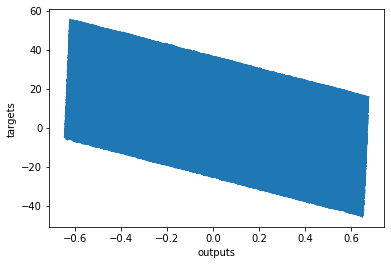

In [10]:
out = sess.run([outputs], feed_dict={inputs: training_data['inputs']})
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()